In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from sklearn.preprocessing import Imputer


DATA_DIR = '../../data/'
print(os.listdir(DATA_DIR))

['CleanLoLMatchHistory2.csv', 'openaq.csv', 'CleanLoLMatchHistory3.csv', '.DS_Store', 'LoLMatchHistory.txt', 'CleanLoLMatchHistory.csv', 'LoL Match Making Statistics.ipynb', '.ipynb_checkpoints', 'CleanLoLMatchHistory3.xlsx', 'LolUpdatedStats.txt', 'CleanLoLMatchHistoryUpdate.csv']


In [2]:
filename = DATA_DIR + 'openaq.csv'
df = pd.read_csv(filename)
# grouped = df.groupby('utc')
# for name,group in grouped:
#     print(name)
#     print(group)

In [3]:
df_pivot = df.pivot(index='utc', columns='parameter', values='value').add_prefix('sensor_').reset_index()

In [5]:
df_pivot.head()

parameter,utc,sensor_co,sensor_no2,sensor_o3,sensor_pm10,sensor_so2
0,2018-07-20T02:15:00.000Z,325.0,11.0,0.0,35.0,10.0
1,2018-07-20T03:15:00.000Z,213.0,8.0,0.0,21.0,10.0
2,2018-07-20T04:00:00.000Z,284.0,11.0,0.0,17.0,10.0
3,2018-07-20T04:15:00.000Z,388.0,23.0,0.0,18.0,9.0
4,2018-07-20T05:15:00.000Z,288.0,43.0,0.0,25.0,7.0


In [8]:
imp = Imputer(missing_values='NaN', strategy='mean',axis=0)
imp.fit()

TypeError: fit() got an unexpected keyword argument 'missing_values'

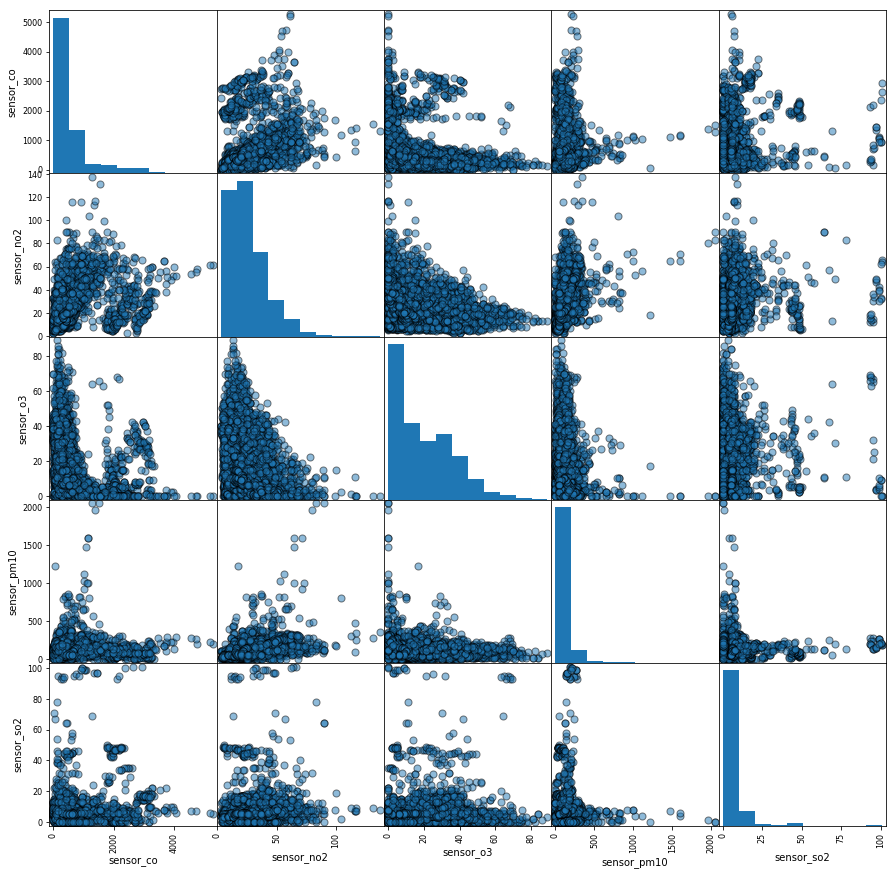

In [20]:
pd.plotting.scatter_matrix(df_pivot.loc[:, df_pivot.columns != 'utc'],
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       edgecolor= "black")
plt.show()

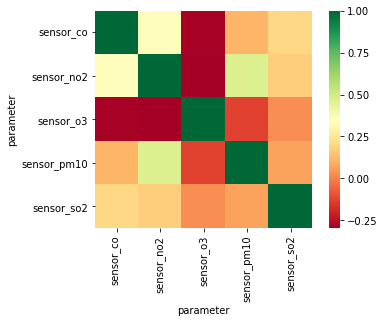

In [21]:
sns.heatmap(df_pivot.corr(), square=True, cmap='RdYlGn')
plt.show()

R^2 score:  0.2216529667359511


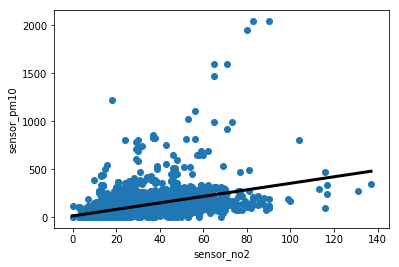

In [59]:
x_col = 'sensor_no2'
y_col = 'sensor_pm10'

# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
x = np.array(df_pivot.loc[:,x_col]).reshape(-1,1)
y = np.array(df_pivot.loc[:,y_col]).reshape(-1,1)

# print(x.shape)
# print(y.shape)


# print(np.where(np.isnan(x)))
# print(np.where(np.isnan(y)))
x = np.nan_to_num(x)
y = np.nan_to_num(y)


# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

In [123]:
df.describe()

,value,latitude,longitude
count,20671.00000,2.067100e+04,2.067100e+04
mean,148.95917,4.793291e+01,1.069214e+02
std,377.76512,2.620545e-11,3.328263e-11
min,0.00000,4.793291e+01,1.069214e+02
25%,8.00000,4.793291e+01,1.069214e+02
50%,28.00000,4.793291e+01,1.069214e+02
75%,107.00000,4.793291e+01,1.069214e+02
max,5269.00000,4.793291e+01,1.069214e+02


In [21]:
df['parameter'].unique()

array(['co', 'pm10', 'o3', 'no2', 'so2'], dtype=object)

In [32]:


# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable


x_param = 'co'
y_param = 'pm10'

x = df.loc[df['parameter'] == 'co'].value
y = df.loc[df['parameter'] == 'pm10'].value
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

ValueError: x and y must be the same size